In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("ushape (1).csv")
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [6]:
df.shape

(100, 3)

In [7]:
df.columns

Index(['X', 'Y', 'class'], dtype='object')

In [9]:
df.describe()

,X,Y,class
count,100.000000,100.000000,100.000000
mean,0.500420,0.228701,0.500000
std,0.891044,0.592885,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.140330,-0.203260,0.000000
50%,0.470678,0.188660,0.500000
75%,1.112008,0.658448,1.000000
max,2.181372,1.571899,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   class   100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [11]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

In [12]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

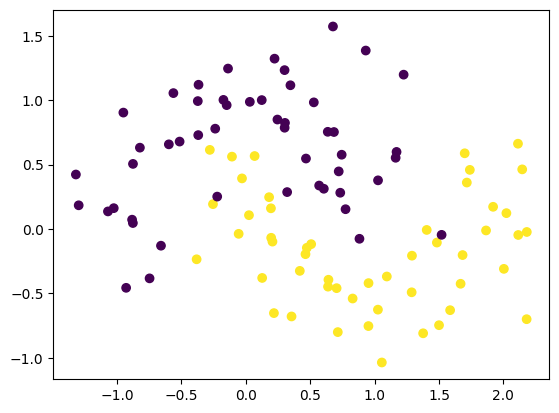

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [16]:
clf.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<Axes: >

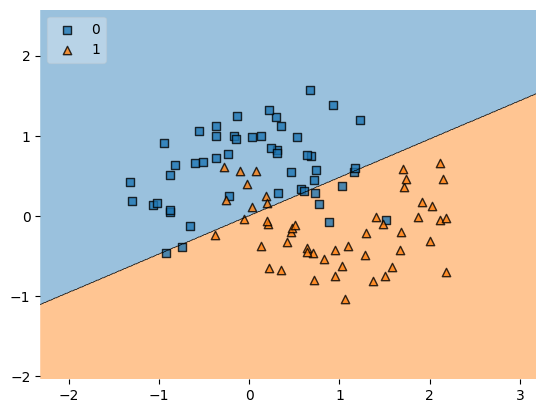

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf,legend=2)

In [21]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_trf=poly.fit_transform(X)

In [23]:
clf1=LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [28]:
def plot_decision_boundary(X,y,degree=1):
    poly=PolynomialFeatures(degree=degree)
    X_trf=poly.fit_transform(X)

    clf=LogisticRegression()
    clf.fit(X_trf,y)

    accuracy=np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
    b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)

    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title('Degree ={}, accuracy is {}'.format(degree,np.round(accuracy,4)))

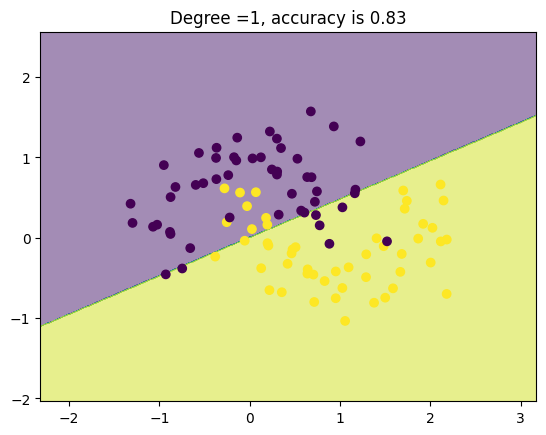

In [29]:
plot_decision_boundary(X,y)

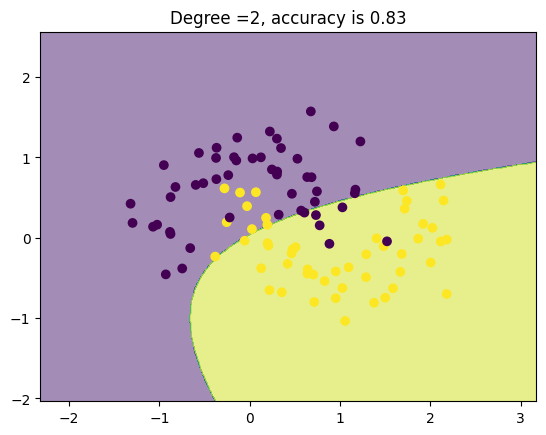

In [30]:
plot_decision_boundary(X,y,degree=2)

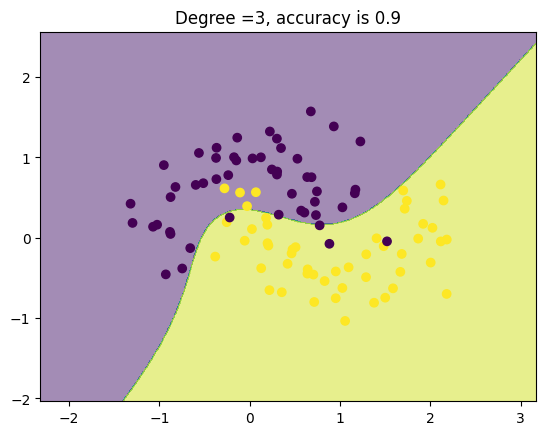

In [31]:
plot_decision_boundary(X,y,degree=3)

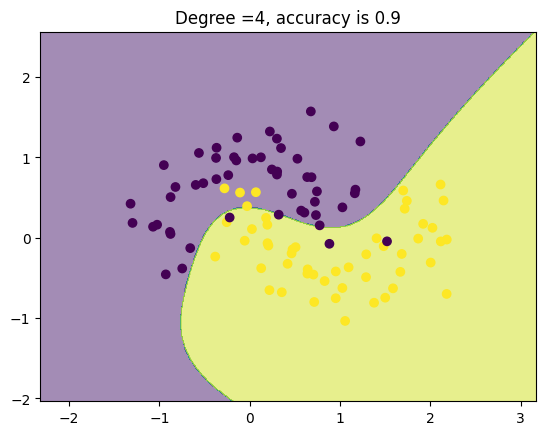

In [32]:
plot_decision_boundary(X,y,degree=4)

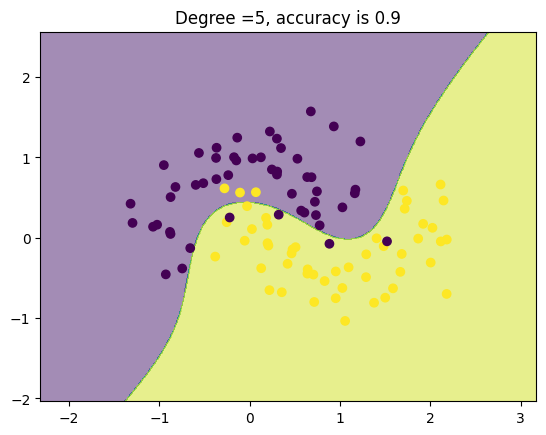

In [33]:
plot_decision_boundary(X,y,degree=5)

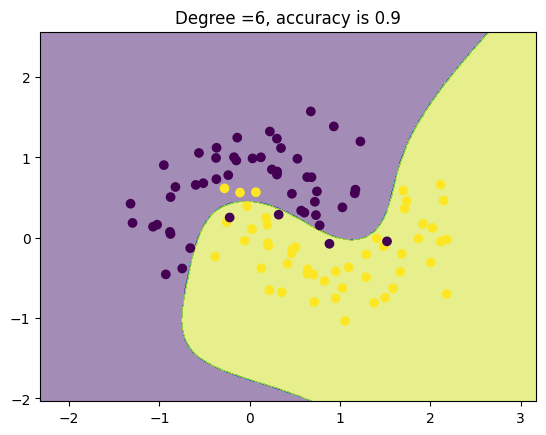

In [34]:
plot_decision_boundary(X,y,degree=6)

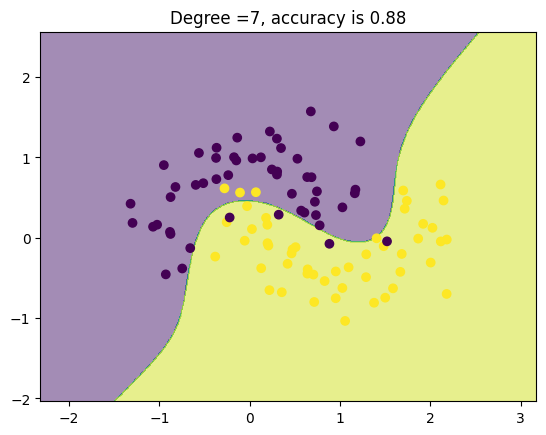

In [35]:
plot_decision_boundary(X,y,degree=7)

/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

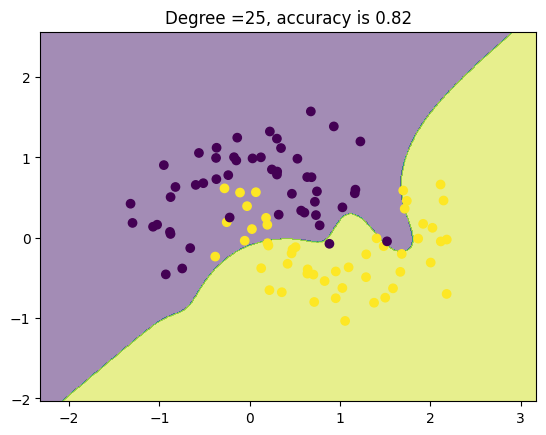

In [36]:

plot_decision_boundary(X,y,degree=25)